### KNearest Neighbors - Zoo Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Zoo.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


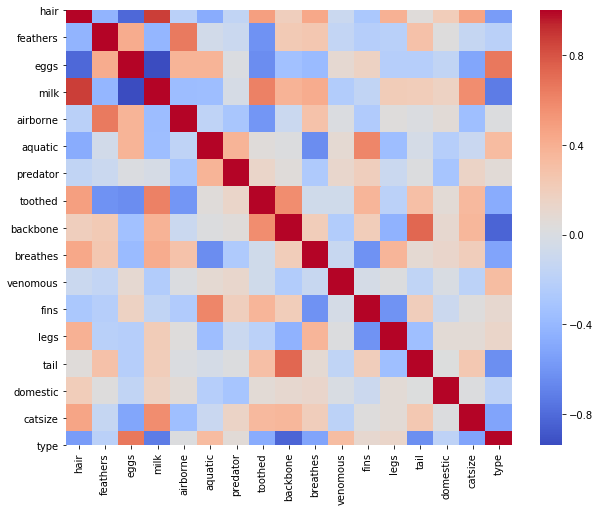

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm')

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['type','animal name'],axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 30% for testing model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix ,plot_confusion_matrix, classification_report

In [48]:
accuracy = []

for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k,metric="minkowski", p=2)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    accuracy.append(accuracy_score(y_test,y_pred_test))

Text(0.5, 0, 'K Value')

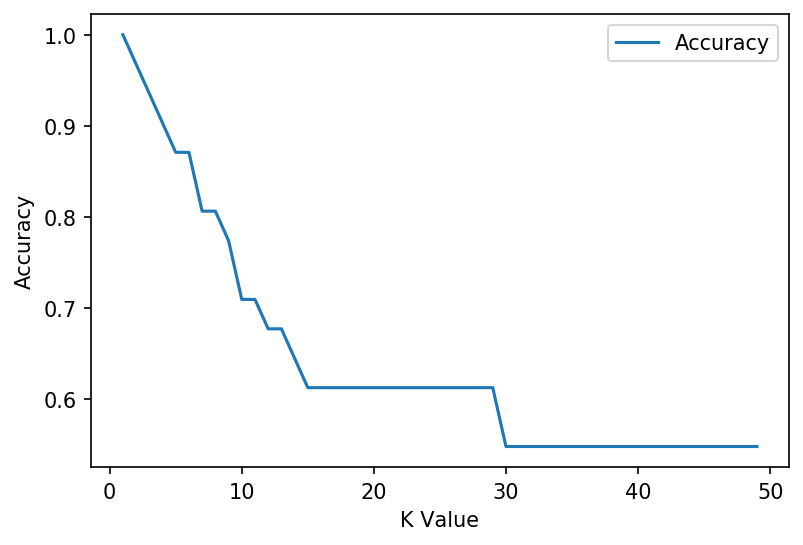

In [49]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(range(1,50),accuracy,label='Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel("K Value")

In [50]:
# Lets choose k value = 5 first elbow in the above figure
knn_model = KNeighborsClassifier(n_neighbors=5,metric="minkowski", p=2) #p=2 is euclidian distance
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn_model.predict(X_test)

In [52]:
print("Model Accuracy :{:.2f}".format(accuracy_score(y_test,y_pred)))

Model Accuracy :0.87


In [53]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]], dtype=int64)

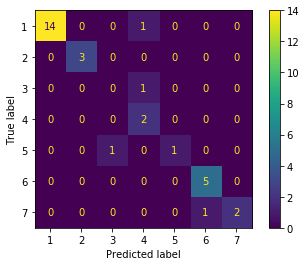

In [54]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31



### From above confusion matrix we can see that model has predicted more true positives 